<h1 align="center">  Google Play Store Apps Data Analysis & Visualization</h1>

<h3 align="center"> ( Data From 2010 To 2018 ) </h3>

---

## Import Libraries

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Getting Know About Dataset

In [19]:
df = pd.read_csv('googleplaystore.csv')

In [20]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [21]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


---

## Data Cleaning

In [22]:
#check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [24]:
#check null values
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [26]:
# Fill Rating Null Values With Means Of Rating Coluumn

df['Rating'].fillna((df['Rating'].mean()), inplace=True)

In [30]:
# Drop Other Rows With  Misiing Values

df.dropna(inplace=True)

In [85]:
#change 'review' column data type to numeric

df['Reviews'] = pd.to_numeric(df['Reviews'])

In [151]:
#seperate price with '$' mark

df['Price'] = df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
df['Price'] = df['Price'].apply(lambda x: float(x))

In [33]:
# Convert 'Last_Updated' Column Data type To datetime Format

df['Last Updated'] = pd.to_datetime(df['Last Updated'])

In [35]:
# Seperate Year From 'Last_Updated' Column

df['Last_Updated_Year'] = df['Last Updated'].dt.year

In [125]:
#seperate '+' marks from values

df['Installs'] = df['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else str(x))
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else str(x))
df['Installs'] = df['Installs'].apply(lambda x: float(x))

In [152]:
# check agin to confirm the changes

df.dtypes

App                          object
Category                     object
Rating                      float64
Reviews                       int64
Size                         object
Installs                    float64
Type                         object
Price                       float64
Content Rating               object
Genres                       object
Last Updated         datetime64[ns]
Current Ver                  object
Android Ver                  object
Last_Updated_Year             int64
dtype: object

In [153]:
# display first 5 rows after changes

df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last_Updated_Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,2018


---

## Exploratory Data Analysis & Visualization

> ## Top 10 Categories With Highest Apps Count

In [41]:
#Top Categories With Highest Apps

df['Category'].value_counts().head(10)

FAMILY             1968
GAME               1144
TOOLS               841
MEDICAL             463
BUSINESS            460
PRODUCTIVITY        424
PERSONALIZATION     390
COMMUNICATION       387
SPORTS              384
LIFESTYLE           382
Name: Category, dtype: int64

> ## Each Categories With Apps Count

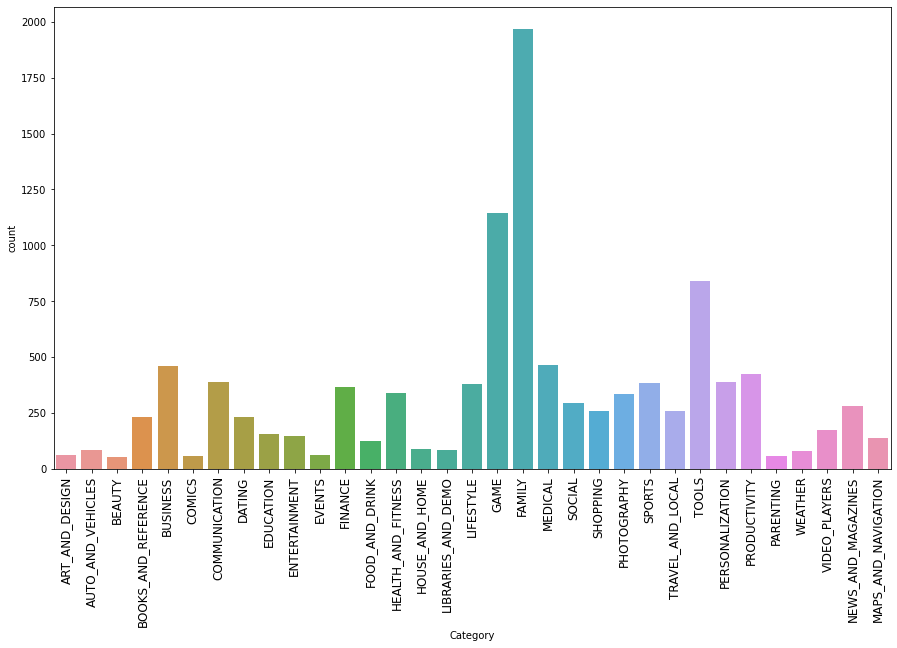

In [43]:
# Visualiza Apps Count By Category

plt.figure(figsize=(15,8.5))
sns.countplot(df['Category'])
plt.xticks(rotation='vertical',size=12)
plt.show()

---

> ## Apps Count By Type

In [44]:
# Apps Count By Type

df['Type'].value_counts()

Free    10032
Paid      797
Name: Type, dtype: int64

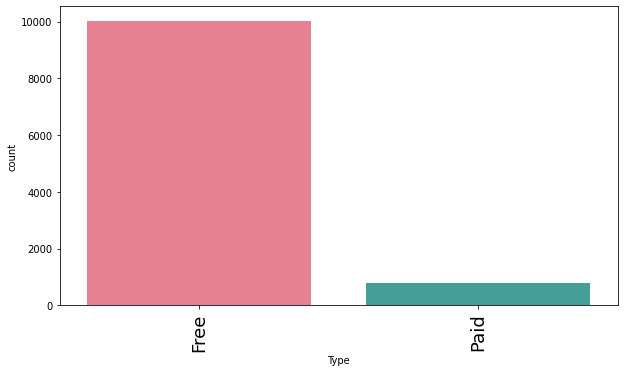

In [56]:
# Visualiza Apps Count By Type

plt.figure(figsize=(10,5.5))
sns.countplot(df['Type'],palette='husl')
plt.xticks(rotation='vertical',size=18)
plt.show()

---

> ## Apps Count By content Rating

In [48]:
# Apps Count By content rating

df['Content Rating'].value_counts()

Everyone           8704
Teen               1208
Mature 17+          499
Everyone 10+        413
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

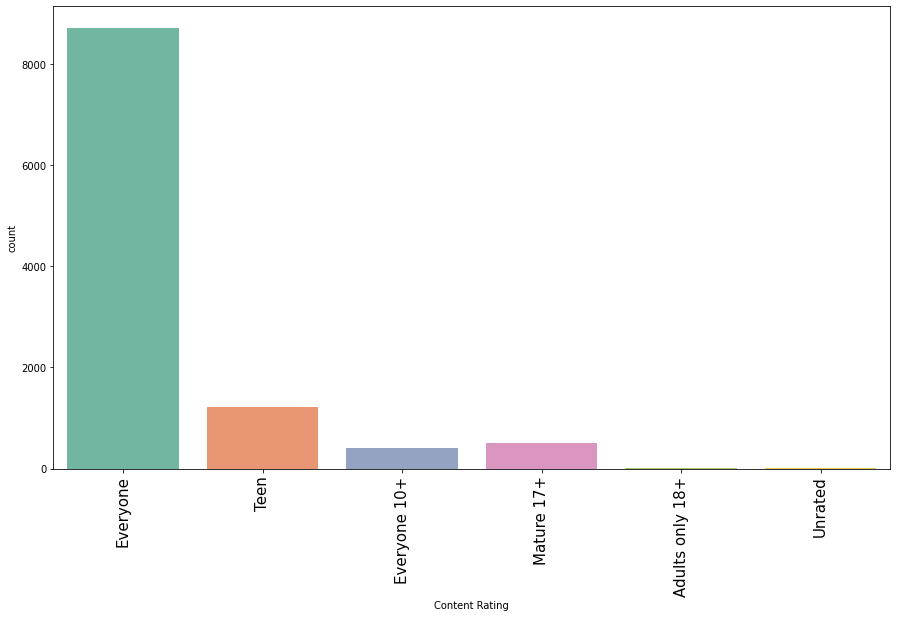

In [65]:
# Visualize Apps Count By Type

plt.figure(figsize=(15,8.5))
sns.countplot(df['Content Rating'],palette='Set2')
plt.xticks(rotation='vertical',size=15)
plt.show()

--- 

>## Apps Count By Genres

In [57]:
# Apps Count By Type

df['Genres'].value_counts()

Tools                                840
Entertainment                        622
Education                            548
Medical                              463
Business                             460
                                    ... 
Parenting;Brain Games                  1
Travel & Local;Action & Adventure      1
Board;Pretend Play                     1
Role Playing;Education                 1
Trivia;Education                       1
Name: Genres, Length: 119, dtype: int64

> ## Top 10 Genres With Highest Number Of Apps

In [58]:
df['Genres'].value_counts().head(10)

Tools              840
Entertainment      622
Education          548
Medical            463
Business           460
Productivity       424
Sports             398
Personalization    390
Communication      387
Lifestyle          381
Name: Genres, dtype: int64

>## Visualiza Top 10 Genres With Highest Number Of Apps

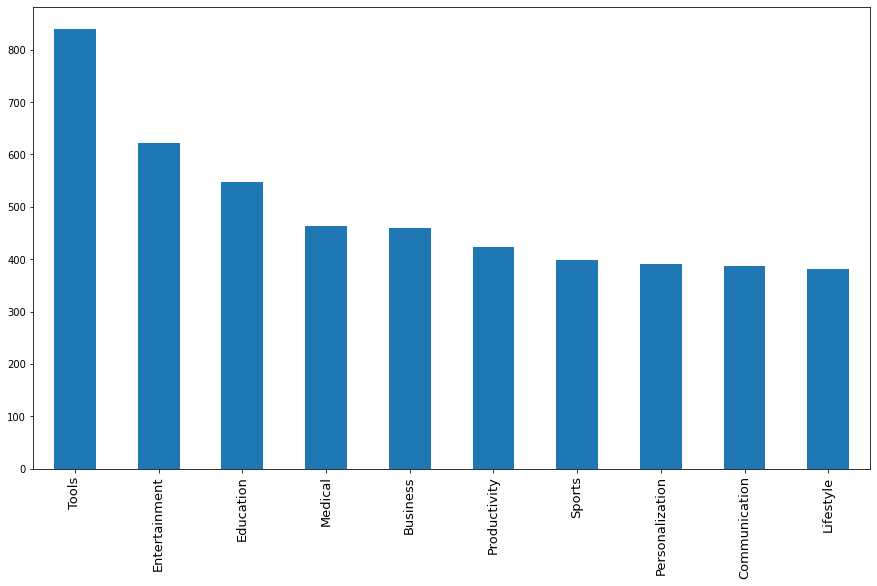

In [70]:
# Visualize Apps Count By Type

plt.figure(figsize=(15,8.5))
df['Genres'].value_counts().head(10).plot(kind='bar')
plt.xticks(rotation='vertical',size=13)
plt.show()

---

>## Apps Count By Installtions Amounts 

In [128]:
df['Installs'].value_counts().head(10)

1000000.0     1578
10000000.0    1252
100000.0      1169
10000.0       1052
1000.0         905
5000000.0      752
100.0          718
500000.0       538
50000.0        478
5000.0         476
Name: Installs, dtype: int64

>## Visualize Apps Count By Installions Amount

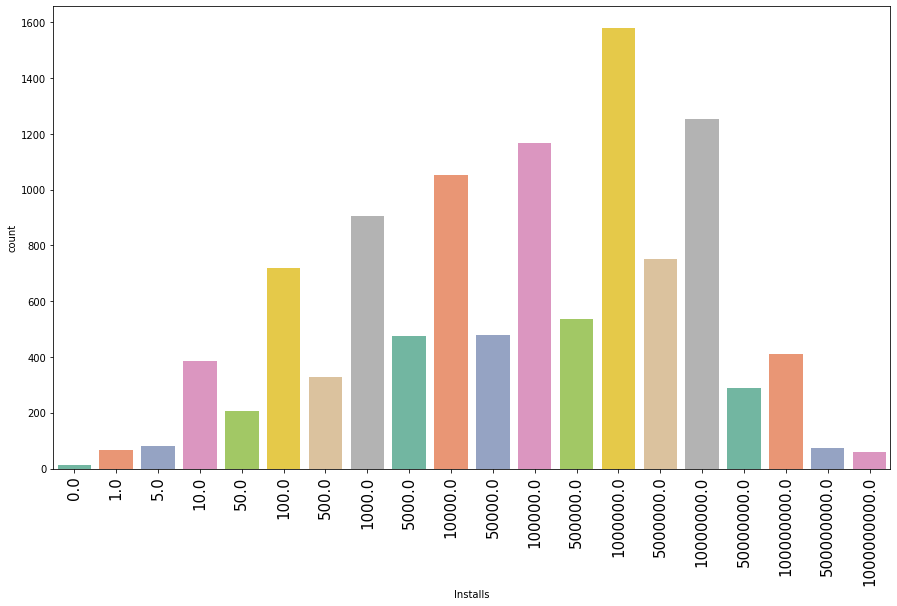

In [129]:
# Visualize Apps Count By Type

plt.figure(figsize=(15,8.5))
sns.countplot(df['Installs'],palette='Set2')
plt.xticks(rotation='vertical',size=15)
plt.show()

---

> ## Apps Count With Last Updated Year

In [78]:
df['Last_Updated_Year'].value_counts()

2018    7344
2017    1864
2016     802
2015     459
2014     209
2013     109
2012      26
2011      15
2010       1
Name: Last_Updated_Year, dtype: int64

>## Visualize Apps Count With Last Updated Year

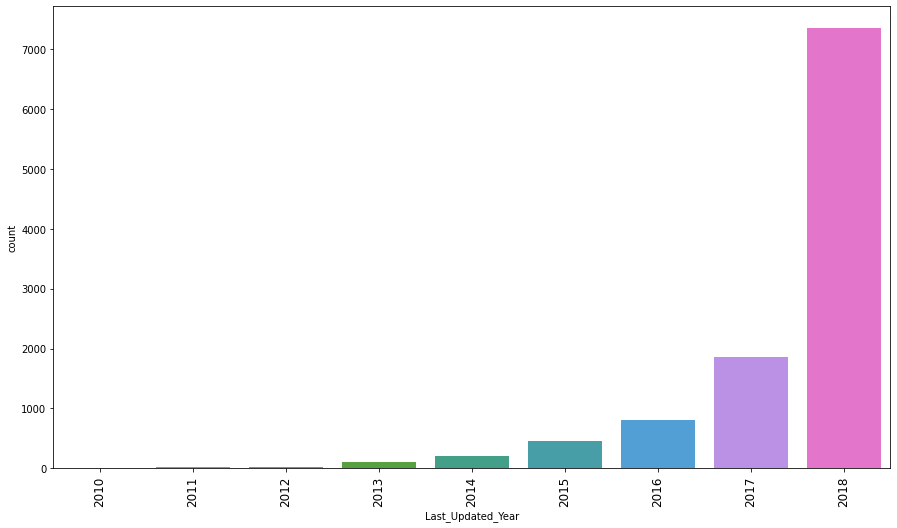

In [83]:
# Visualize Apps Count With Last Updated Year

plt.figure(figsize=(15,8.5))
sns.countplot(df['Last_Updated_Year'],palette='husl')
plt.xticks(rotation='vertical',size=12)
plt.show()

---

>## Categories With Highest Number Of Reviews

In [87]:
gr_cat = df.groupby('Category').sum()['Reviews'].reset_index()

In [90]:
gr_cat_sort = gr_cat.sort_values('Reviews',ascending=False)

>## Top 10 Categories With Highest Number Of Reviews

In [102]:
gr_cat_sort.head(10)

,Category,Reviews
14,GAME,1585422349
6,COMMUNICATION,815462260
27,SOCIAL,621241422
11,FAMILY,410226107
29,TOOLS,273181033
24,PHOTOGRAPHY,213516650
26,SHOPPING,115041222
25,PRODUCTIVITY,114116975
31,VIDEO_PLAYERS,110380188
23,PERSONALIZATION,89345721


>## Visualize Top 10 Categories With Highest Number Of Reviews

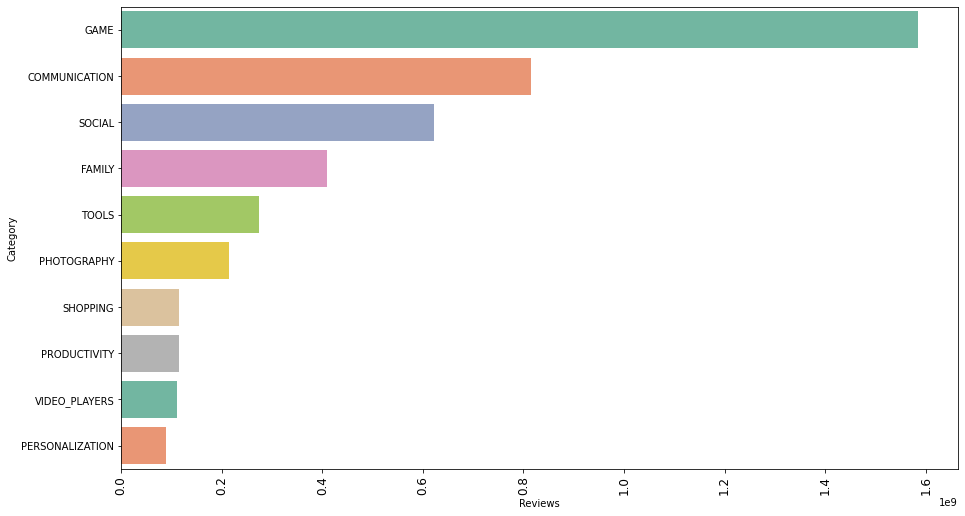

In [96]:
plt.figure(figsize=(15,8.5))

ax = sns.barplot(x="Reviews", y="Category", data=gr_cat_sort.head(10),
                 palette="Set2")

plt.xticks(rotation='vertical',size=12)
plt.show()


---

>## Top 10 Categories With Lowest Number Of Reviews

In [101]:
gr_cat_sort_asc = gr_cat.sort_values('Reviews',ascending=True)
gr_cat_sort_asc.head(10)

,Category,Reviews
10,EVENTS,161018
2,BEAUTY,396240
22,PARENTING,958331
17,LIBRARIES_AND_DEMO,1016973
1,AUTO_AND_VEHICLES,1163666
20,MEDICAL,1585975
0,ART_AND_DESIGN,1714385
5,COMICS,3383276
16,HOUSE_AND_HOME,3976385
7,DATING,7291278


>## Visualize Top 10 Categories With Lowest Number Of Reviews

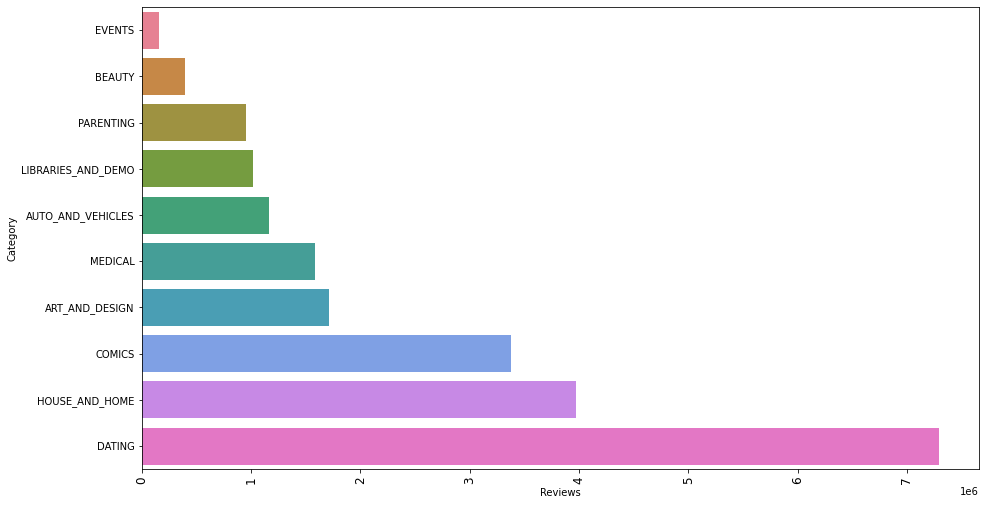

In [100]:
plt.figure(figsize=(15,8.5))

ax = sns.barplot(x="Reviews", y="Category", data=gr_cat_sort_asc.head(10),
                 palette="husl")

plt.xticks(rotation='vertical',size=12)
plt.show()

---

>## Content Ratings With Reviews Count 

In [104]:
cont_rat = df.groupby('Content Rating').sum()['Reviews'].reset_index()
cont_rat_sort = cont_rat.sort_values('Reviews',ascending=False)
cont_rat_sort

,Content Rating,Reviews
1,Everyone,2801822515
4,Teen,1131523721
2,Everyone 10+,683997228
3,Mature 17+,197166533
0,Adults only 18+,81348
5,Unrated,1187


>## Visualize Content Ratings With Reviews Count

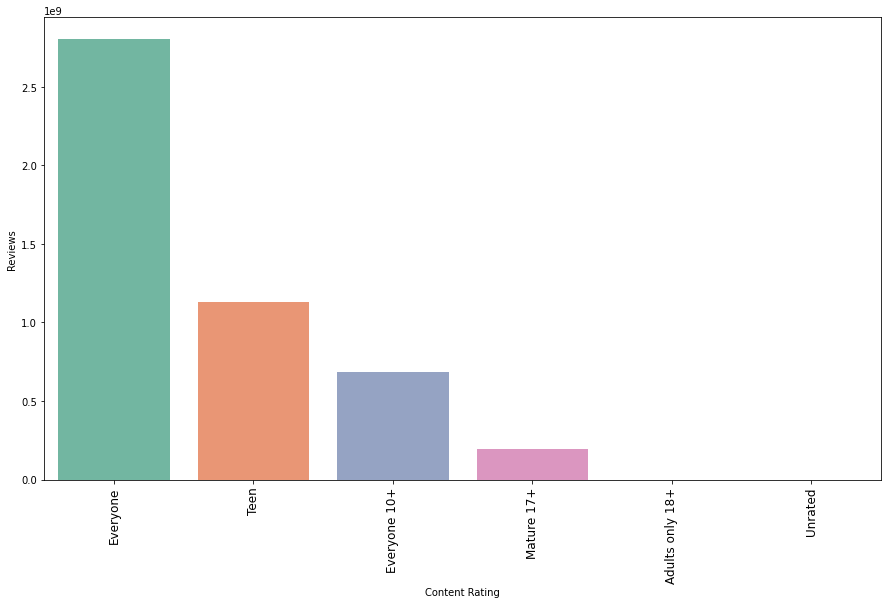

In [106]:
plt.figure(figsize=(15,8.5))

ax = sns.barplot(x="Content Rating", y="Reviews", data=cont_rat_sort.head(10),
                 palette="Set2")

plt.xticks(rotation='vertical',size=12)
plt.show()

---

>## Apps Ratings Distribution 

Text(0, 0.5, 'Number of Apps')

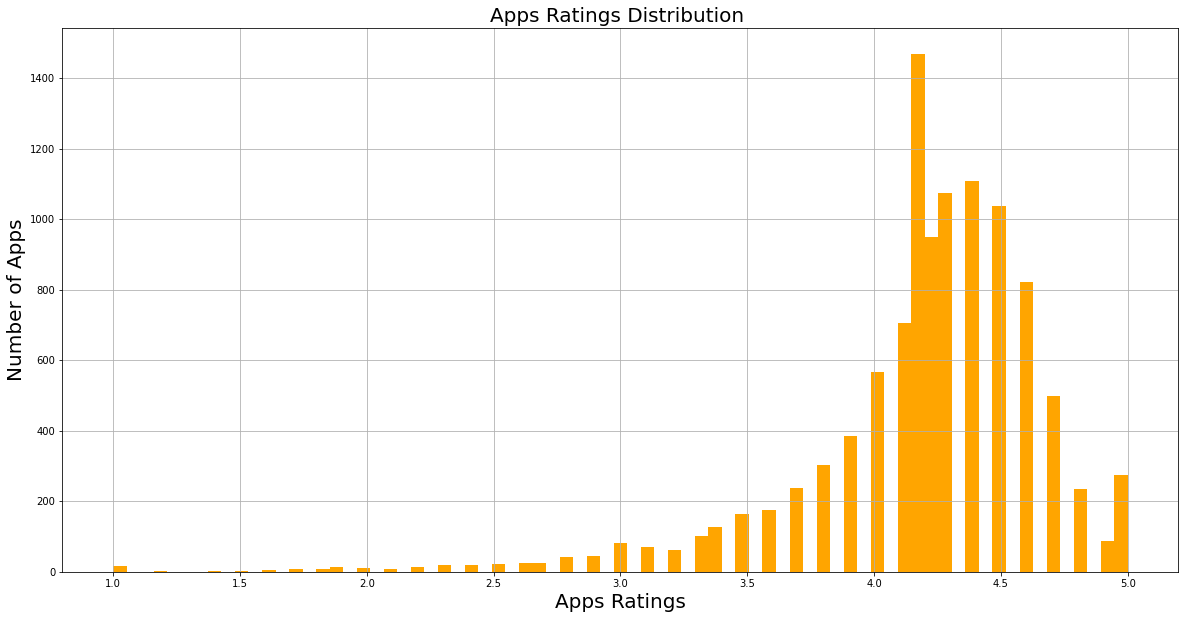

In [232]:
fig, ax = plt.subplots(1, 1, figsize = (20,10))
df['Rating'].hist(bins=75, ax=ax,histtype='bar',color = "orange")
plt.xlabel('Apps Ratings',fontsize=20)
plt.title('Apps Ratings Distribution ',fontsize=20)
plt.ylabel('Number of Apps',fontsize=20)

---

>## Distriptive Statistic About Apps Ratings

In [114]:
df['Rating'].describe()

count    10829.000000
mean         4.192041
std          0.479038
min          1.000000
25%          4.100000
50%          4.200000
75%          4.500000
max          5.000000
Name: Rating, dtype: float64

>## Apps With Highest Ratings ( 5.0 )

In [130]:
high_ratings = pd.DataFrame(df[(df['Rating'] == 5.0)][['App','Category','Rating','Reviews','Installs','Content Rating']])

In [131]:
high_ratings.shape

(274, 6)

In [132]:
high_ratings.head(5)

,App,Category,Rating,Reviews,Installs,Content Rating
329,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15,1000.0,Everyone
612,American Girls Mobile Numbers,DATING,5.0,5,1000.0,Mature 17+
615,Awake Dating,DATING,5.0,2,100.0,Mature 17+
633,Spine- The dating app,DATING,5.0,5,500.0,Teen
636,Girls Live Talk - Free Text and Video Chat,DATING,5.0,6,100.0,Mature 17+


>## Highest Rated Apps with There Categories

In [122]:
# Highest rated Apps with there categories

high_ratings['Category'].value_counts()

FAMILY                 67
LIFESTYLE              29
MEDICAL                28
BUSINESS               18
TOOLS                  17
HEALTH_AND_FITNESS     12
GAME                   12
PERSONALIZATION        10
PRODUCTIVITY            8
SOCIAL                  8
FINANCE                 8
NEWS_AND_MAGAZINES      7
EVENTS                  6
DATING                  6
SHOPPING                6
BOOKS_AND_REFERENCE     6
PHOTOGRAPHY             6
COMMUNICATION           5
SPORTS                  4
TRAVEL_AND_LOCAL        3
FOOD_AND_DRINK          2
LIBRARIES_AND_DEMO      2
COMICS                  2
PARENTING               1
ART_AND_DESIGN          1
Name: Category, dtype: int64

>## Visualize Highest Rated Apps With There Categories

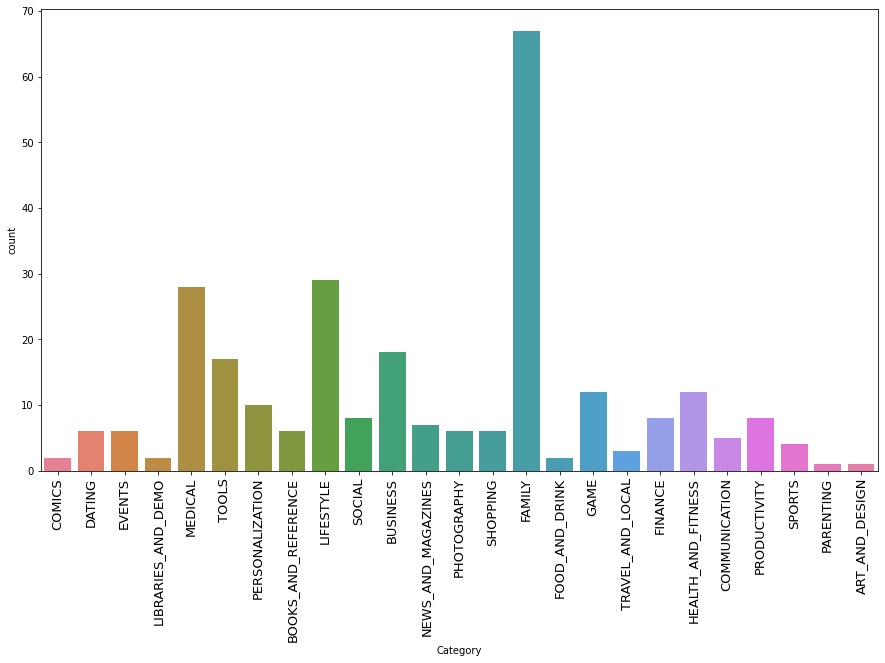

In [121]:
# Visualiza Higiehst rated Apps with there categories

plt.figure(figsize=(15,8.5))
sns.countplot(high_ratings['Category'],palette='husl')
plt.xticks(rotation='vertical',size=13)
plt.show()

---


>## Highest Rated Apps With There Content Ratings

In [123]:
# Highest rated apps with there content ratings

high_ratings['Content Rating'].value_counts()

Everyone        239
Teen             22
Mature 17+       11
Everyone 10+      2
Name: Content Rating, dtype: int64

>## Visualize Highest Rated Apps With There Content Ratings

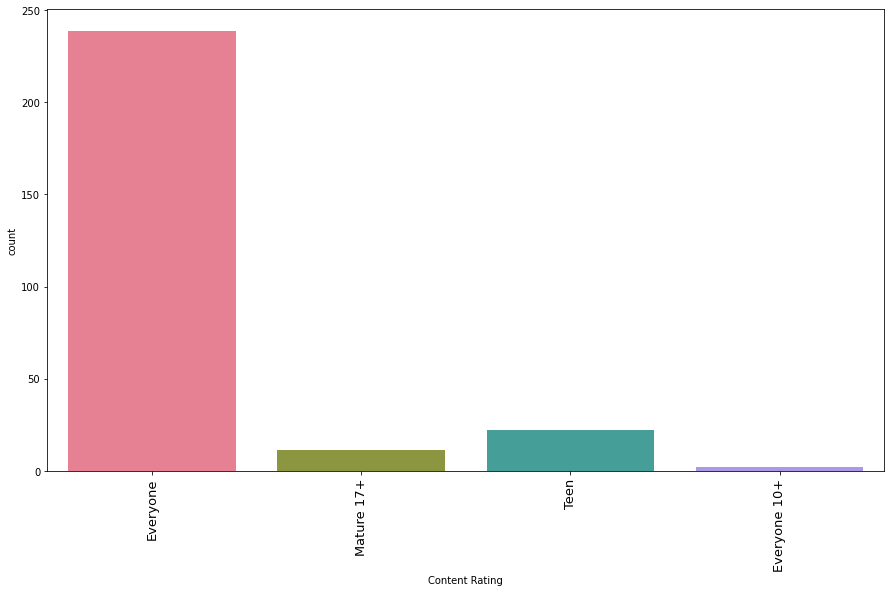

In [124]:
plt.figure(figsize=(15,8.5))
sns.countplot(high_ratings['Content Rating'],palette='husl')
plt.xticks(rotation='vertical',size=13)
plt.show()

---

>## Categories With Installations Count

In [140]:
gr_down = pd.DataFrame(df.groupby('Category').agg({'Installs':sum}).reset_index())

In [141]:
gr_down.head

<bound method NDFrame.head of                Category      Installs
0        ART_AND_DESIGN  1.243331e+08
1     AUTO_AND_VEHICLES  5.313021e+07
2                BEAUTY  2.719705e+07
3   BOOKS_AND_REFERENCE  1.921469e+09
4              BUSINESS  1.001915e+09
5                COMICS  5.608615e+07
6         COMMUNICATION  3.264728e+10
7                DATING  2.643108e+08
8             EDUCATION  8.714520e+08
9         ENTERTAINMENT  2.869160e+09
10               EVENTS  1.597316e+07
11               FAMILY  1.025820e+10
12              FINANCE  8.766487e+08
13       FOOD_AND_DRINK  2.738988e+08
14                 GAME  3.508602e+10
15   HEALTH_AND_FITNESS  1.583073e+09
16       HOUSE_AND_HOME  1.687125e+08
17   LIBRARIES_AND_DEMO  6.199591e+07
18            LIFESTYLE  5.376435e+08
19  MAPS_AND_NAVIGATION  7.242819e+08
20              MEDICAL  5.325744e+07
21   NEWS_AND_MAGAZINES  7.496318e+09
22            PARENTING  3.152111e+07
23      PERSONALIZATION  2.325484e+09
24          PHOTOGRA

>## Top Categories With Highest Installations Count

In [143]:
gr_down_sort = gr_down.sort_values('Installs',ascending=False)
gr_down_sort

,Category,Installs
14,GAME,3.508602e+10
6,COMMUNICATION,3.264728e+10
25,PRODUCTIVITY,1.417609e+10
27,SOCIAL,1.406987e+10
29,TOOLS,1.145227e+10
11,FAMILY,1.025820e+10
24,PHOTOGRAPHY,1.008825e+10
21,NEWS_AND_MAGAZINES,7.496318e+09
30,TRAVEL_AND_LOCAL,6.868887e+09
31,VIDEO_PLAYERS,6.222003e+09


>## Visualize Top Categories With Highest Installations Count

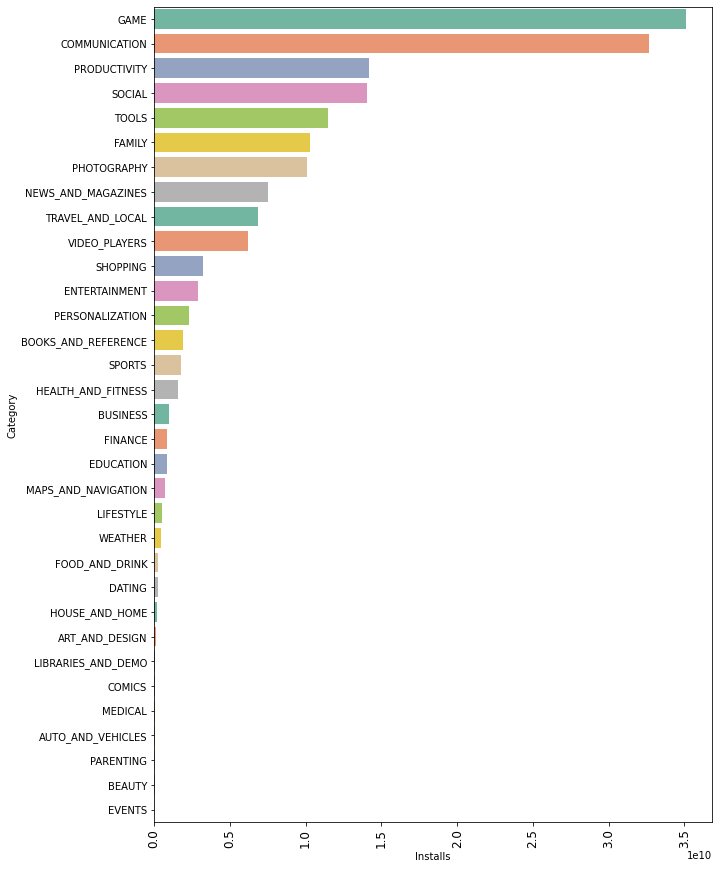

In [146]:
plt.figure(figsize=(10,15))

ax = sns.barplot(x="Installs", y="Category", data=gr_down_sort,
                 palette="Set2")

plt.xticks(rotation='vertical',size=12)
plt.show()

---

>## Top Content Rating With Installtion Amount

In [147]:
gr_down_content = pd.DataFrame(df.groupby('Content Rating').agg({'Installs':sum}).reset_index())
gr_down_content_sort = gr_down_content.sort_values('Installs',ascending=False)
gr_down_content_sort

,Content Rating,Installs
1,Everyone,1.141551e+11
4,Teen,3.471635e+10
2,Everyone 10+,1.323388e+10
3,Mature 17+,5.524491e+09
0,Adults only 18+,2.000000e+06
5,Unrated,5.050000e+04


>## Visualize Top Content Rating With Installtion Amount

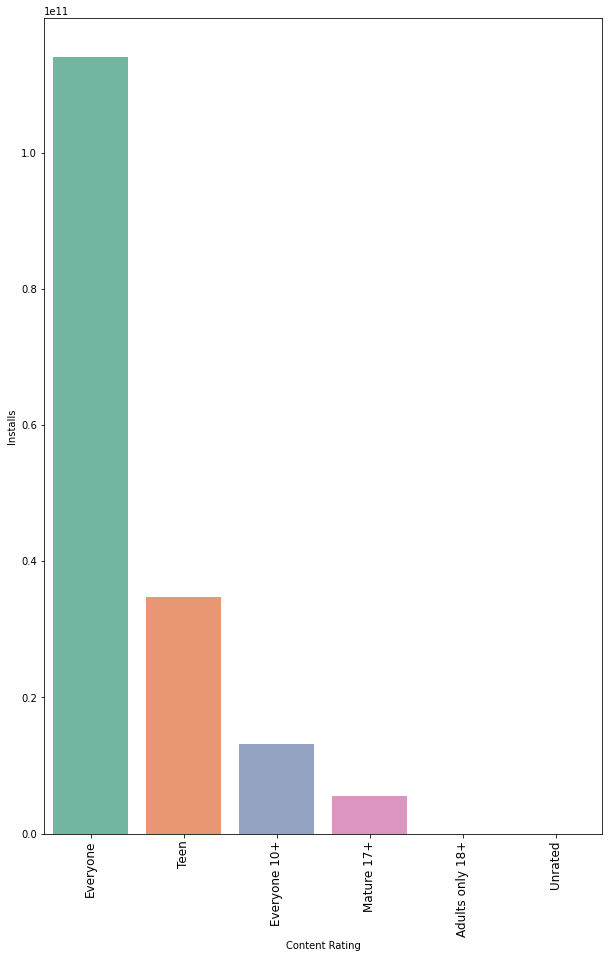

In [149]:
plt.figure(figsize=(10,15))

ax = sns.barplot(x="Content Rating", y="Installs", data=gr_down_content_sort,
                 palette="Set2")

plt.xticks(rotation='vertical',size=12)
plt.show()

---

>## Distribution About Paid Apps 

In [154]:
paid_apps = pd.DataFrame(df[(df['Price'] > 0.0)])

In [156]:
paid_apps.shape

(797, 14)

### There are 797 Paid Apps 

In [157]:
paid_apps.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last_Updated_Year
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,100000.0,Paid,4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up,2018
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,100000.0,Paid,4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up,2017
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,100000.0,Paid,4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up,2018
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,100000.0,Paid,4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up,2017
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,100000.0,Paid,3.99,Everyone,Communication,2018-07-05,7.5.3.20547,4.1 and up,2018


>## Paid Apps parices Distribution

Text(0, 0.5, 'Number of Apps')

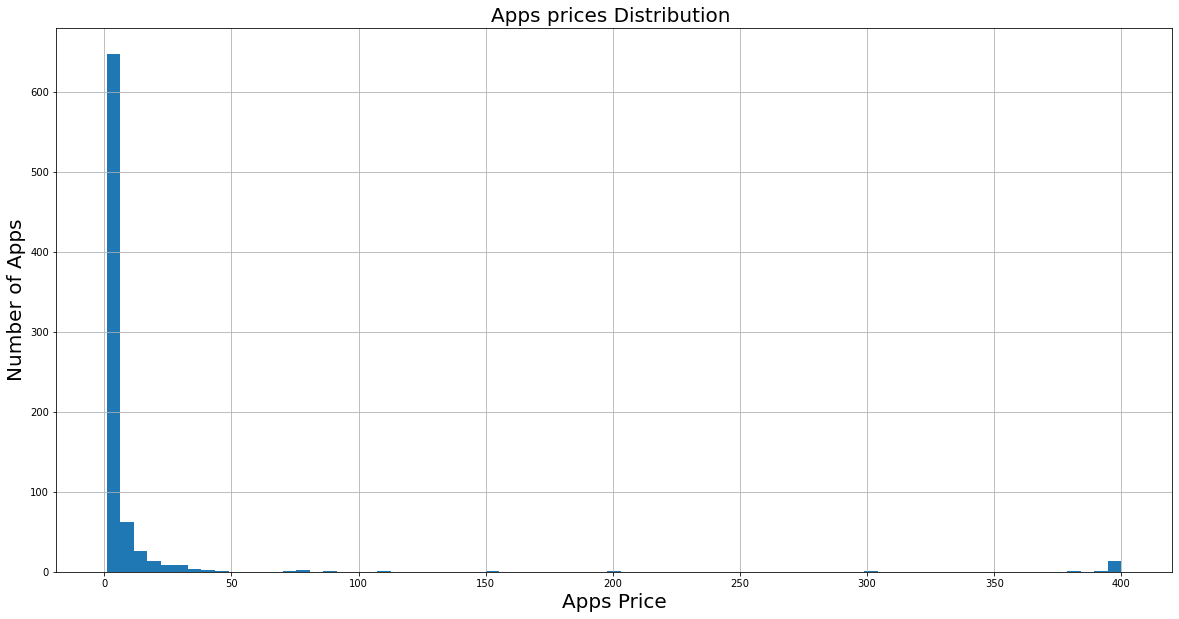

In [196]:
fig, ax = plt.subplots(1, 1, figsize = (20,10))
paid_apps['Price'].hist(bins=75, ax=ax,histtype='bar')
plt.xlabel('Apps Price',fontsize=20)
plt.title('Apps prices Distribution ',fontsize=20)
plt.ylabel('Number of Apps',fontsize=20)

>## Paid Apps Ratings Distribution

Text(0, 0.5, 'Number of Apps')

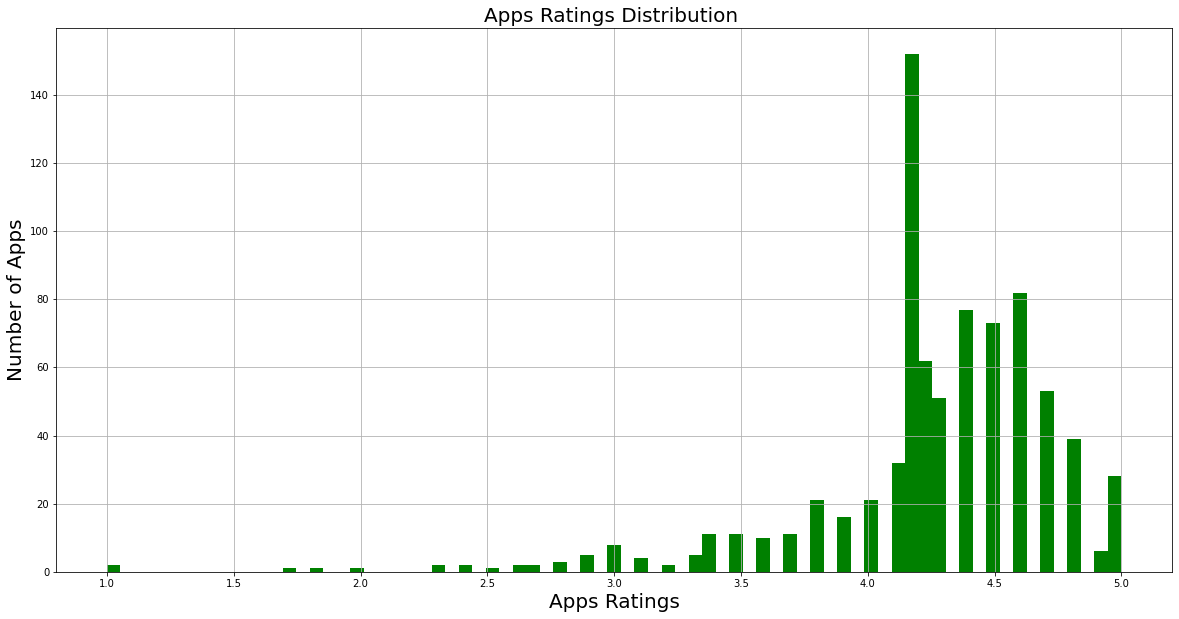

In [230]:
fig, ax = plt.subplots(1, 1, figsize = (20,10))
paid_apps['Rating'].hist(bins=75, ax=ax,histtype='bar',color = "green")
plt.xlabel('Apps Ratings',fontsize=20)
plt.title('Apps Ratings Distribution ',fontsize=20)
plt.ylabel('Number of Apps',fontsize=20)

>## Paid Apps Category Distribution

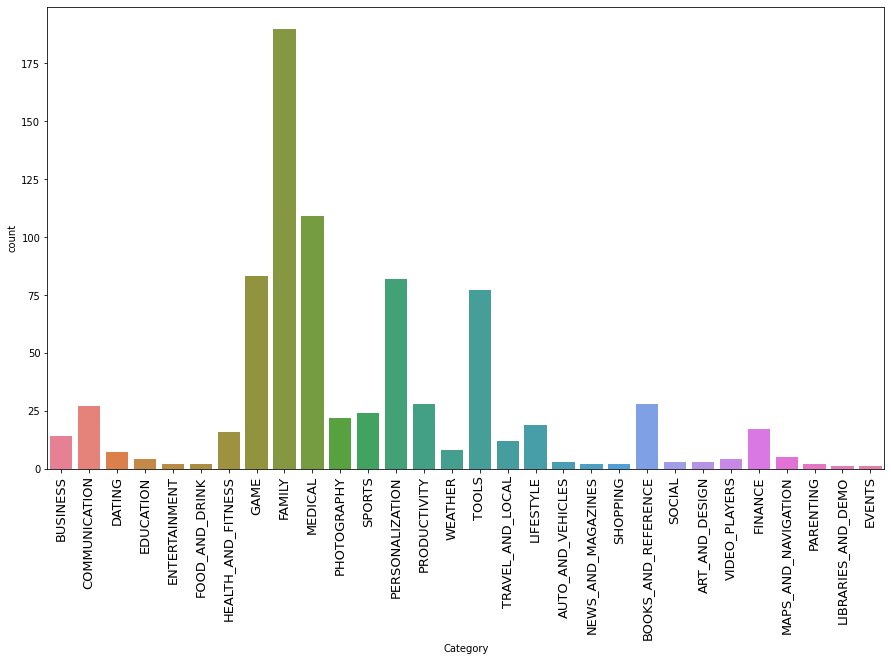

In [158]:
plt.figure(figsize=(15,8.5))
sns.countplot(paid_apps['Category'],palette='husl')
plt.xticks(rotation='vertical',size=13)
plt.show()

>## Paid Apps Genres Distribution

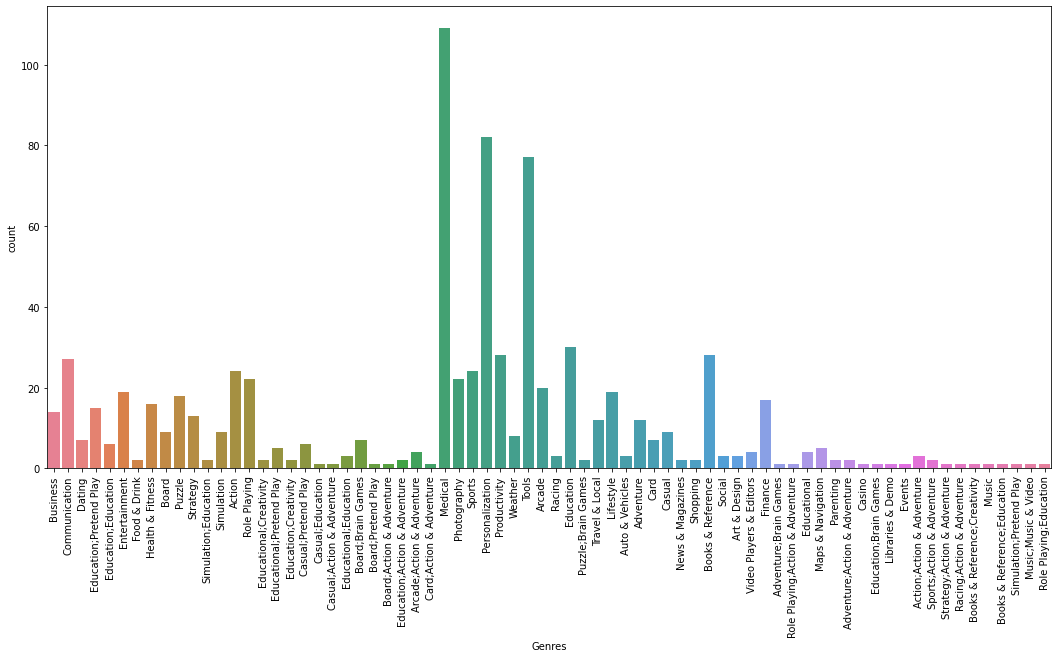

In [176]:
plt.figure(figsize=(18,8.5))
sns.countplot(paid_apps['Genres'],palette='husl')
plt.xticks(rotation='vertical',size=10)
plt.show()

>## Alternative Visualization : Paid Apps Genres Distribution

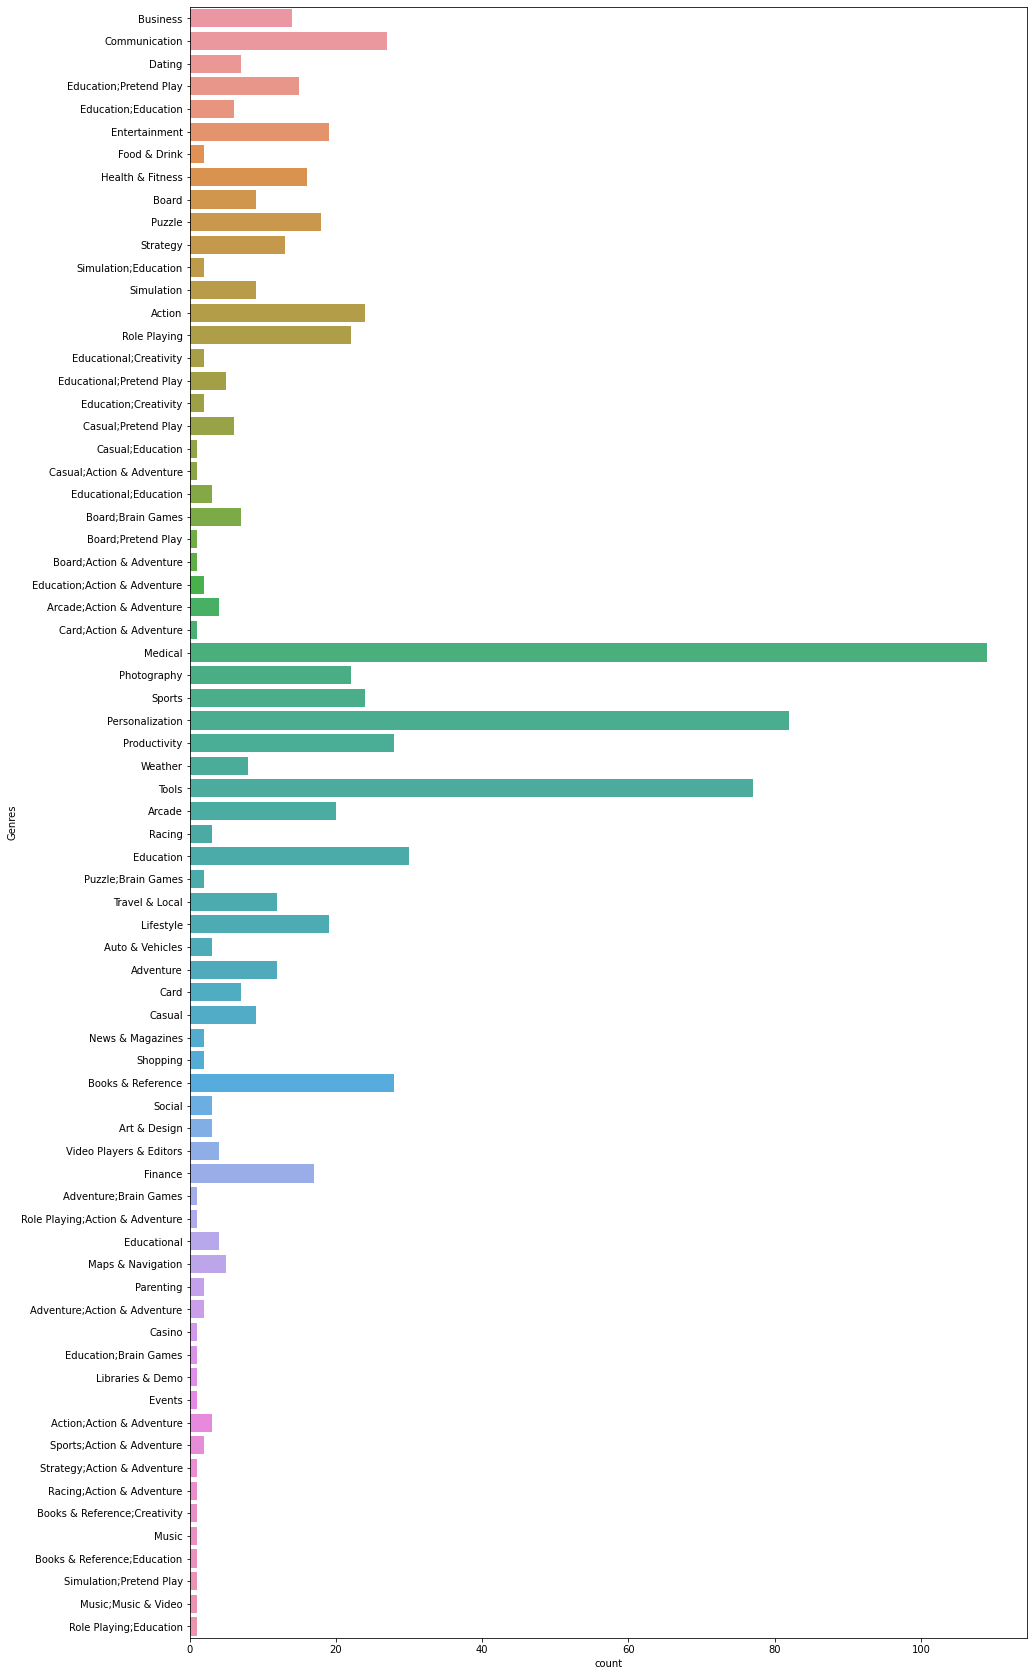

In [178]:
plt.figure(figsize=(15,30))
ax = sns.countplot(y="Genres", data=paid_apps)
plt.show()

>## Most Expensive App 

In [159]:
most_exp_app = pd.DataFrame(df[(df['Price'] == df['Price'].max())])

In [160]:
most_exp_app

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last_Updated_Year
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3M,10000.0,Paid,400.0,Everyone,Lifestyle,2018-05-03,1.0.1,4.1 and up,2018


>## Most Chepest Paid Apps

In [248]:
low_exp_app = pd.DataFrame(df[((df['Price'] > 0.0) & (df['Price'] < 1.0))])
low_exp_app

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last_Updated_Year
2171,All-in-One Mahjong 3,FAMILY,4.400000,38,16M,100.0,Paid,0.99,Everyone,Board;Brain Games,2018-06-14,20180609,4.0 and up,2018
2172,World Racers family board game,FAMILY,4.800000,4,42M,100.0,Paid,0.99,Everyone,Board;Pretend Play,2015-09-03,1.1,5.1 and up,2015
2173,SweetLand — Family Board Game,FAMILY,4.200000,38,47M,1000.0,Paid,0.99,Everyone,Casual;Pretend Play,2014-11-14,1.2,2.3.3 and up,2014
2244,iBP Blood Pressure,MEDICAL,4.400000,578,704k,10000.0,Paid,0.99,Everyone,Medical,2014-11-30,7.0.1,2.2 and up,2014
2275,Blood Pressure Companion,MEDICAL,4.200000,178,4.8M,1000.0,Paid,0.99,Everyone,Medical,2018-07-22,4.1.5 (Steglitz),4.1 and up,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10675,Circle Colors Pack-FN Theme,PERSONALIZATION,4.200000,6,89k,50.0,Paid,0.99,Everyone,Personalization,2013-08-09,1,2.2 and up,2013
10682,Fruit Ninja Classic,GAME,4.300000,85468,36M,1000000.0,Paid,0.99,Everyone,Arcade,2018-06-08,2.4.1.485300,4.0.3 and up,2018
10690,FO Bixby,PERSONALIZATION,5.000000,5,861k,100.0,Paid,0.99,Everyone,Personalization,2018-04-25,0.2,7.0 and up,2018
10697,Mu.F.O.,GAME,5.000000,2,16M,1.0,Paid,0.99,Everyone,Arcade,2017-03-03,1,2.3 and up,2017


### There Aree 146 Paid Apps Lower Than 1$

>## Most Cheapest Apps ( Which price Is Lower Than 10$ )

In [253]:
chep_exp_app = pd.DataFrame(df[((df['Price'] > 10.0) & (df['Price'] > 0.0) )])

In [254]:
chep_exp_app

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last_Updated_Year
2251,Human Anatomy Atlas 2018: Complete 3D Human Body,MEDICAL,4.500000,2921,25M,100000.0,Paid,24.99,Everyone,Medical,2018-05-25,2018.5.47,5.0 and up,2018
2252,Essential Anatomy 3,MEDICAL,4.100000,1533,42M,50000.0,Paid,11.99,Mature 17+,Medical,2014-08-07,1.1.3,4.0.3 and up,2014
2253,Vargo Anesthesia Mega App,MEDICAL,4.600000,92,32M,1000.0,Paid,79.99,Everyone,Medical,2018-06-18,19,4.0.3 and up,2018
2254,EMT Review Plus,MEDICAL,4.500000,199,1.8M,10000.0,Paid,11.99,Everyone,Medical,2018-06-27,3.0.5,4.4W and up,2018
2256,2017 EMRA Antibiotic Guide,MEDICAL,4.400000,12,3.8M,1000.0,Paid,16.99,Everyone,Medical,2017-01-27,1.0.5,4.0.3 and up,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9730,Lean EQ,BUSINESS,4.193338,6,10M,10.0,Paid,89.99,Everyone,Business,2017-02-14,1,4.1 and up,2017
9905,Eu sou Rico,FINANCE,4.193338,0,2.6M,0.0,Paid,30.99,Everyone,Finance,2018-01-09,1,4.0 and up,2018
9917,Eu Sou Rico,FINANCE,4.193338,0,1.4M,0.0,Paid,394.99,Everyone,Finance,2018-07-11,1,4.0.3 and up,2018
9934,I'm Rich/Eu sou Rico/أنا غني/我很有錢,LIFESTYLE,4.193338,0,40M,0.0,Paid,399.99,Everyone,Lifestyle,2017-12-01,MONEY,4.1 and up,2017


>## Apps With Higher Price ( Higher Than 100$ )

In [167]:
most_exp_app = pd.DataFrame(df[(df['Price'] > 100.0)])
most_exp_app.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last_Updated_Year
4197,most expensive app (H),FAMILY,4.3,6,1.5M,100.0,Paid,399.99,Everyone,Entertainment,2018-07-16,1,7.0 and up,2018
4362,💎 I'm rich,LIFESTYLE,3.8,718,26M,10000.0,Paid,399.99,Everyone,Lifestyle,2018-03-11,1.0.0,4.4 and up,2018
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3M,10000.0,Paid,400.00,Everyone,Lifestyle,2018-05-03,1.0.1,4.1 and up,2018
5351,I am rich,LIFESTYLE,3.8,3547,1.8M,100000.0,Paid,399.99,Everyone,Lifestyle,2018-01-12,2,4.0.3 and up,2018
5354,I am Rich Plus,FAMILY,4.0,856,8.7M,10000.0,Paid,399.99,Everyone,Entertainment,2018-05-19,3,4.4 and up,2018


In [166]:
most_exp_app.shape

(20, 14)

###  There Are Paid 20 Apps With Higher Than 100$ Price

>## Visualize Apps With Higher Price ( Higher Than 100$ ) Vs There Genres

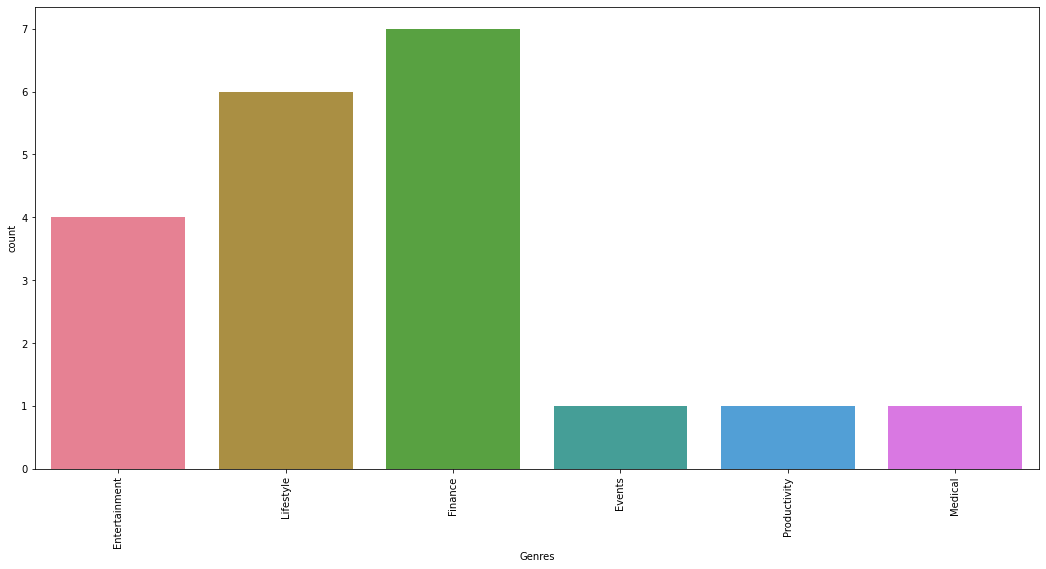

In [255]:
plt.figure(figsize=(18,8.5))
sns.countplot(most_exp_app['Genres'],palette='husl')
plt.xticks(rotation='vertical',size=10)
plt.show()

>## Paid Apps With Moderate Price ( Lower Than 100$ )

In [249]:
moderate_exp_app = pd.DataFrame(df[((df['Price'] < 100.0) & (df['Price'] > 0.0 ))])
moderate_exp_app.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last_Updated_Year
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,100000.0,Paid,4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up,2018
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,100000.0,Paid,4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up,2017
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,100000.0,Paid,4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up,2018
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,100000.0,Paid,4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up,2017
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,100000.0,Paid,3.99,Everyone,Communication,2018-07-05,7.5.3.20547,4.1 and up,2018


In [250]:
moderate_exp_app.shape

(777, 14)

### There Are 777 Paid Apps With Moderate Price ( Lower Than 100$ )

>## Moderate Price Apps vs there Genres

In [251]:
# Apps Count By Type

moderate_exp_app['Genres'].value_counts().head(20)


Medical                   108
Personalization            82
Tools                      77
Education                  30
Books & Reference          28
Communication              27
Productivity               27
Sports                     24
Action                     24
Photography                22
Role Playing               22
Arcade                     20
Puzzle                     18
Health & Fitness           16
Entertainment              15
Education;Pretend Play     15
Business                   14
Strategy                   13
Lifestyle                  13
Adventure                  12
Name: Genres, dtype: int64

>## Visualize Moderate Price Apps vs there Genres

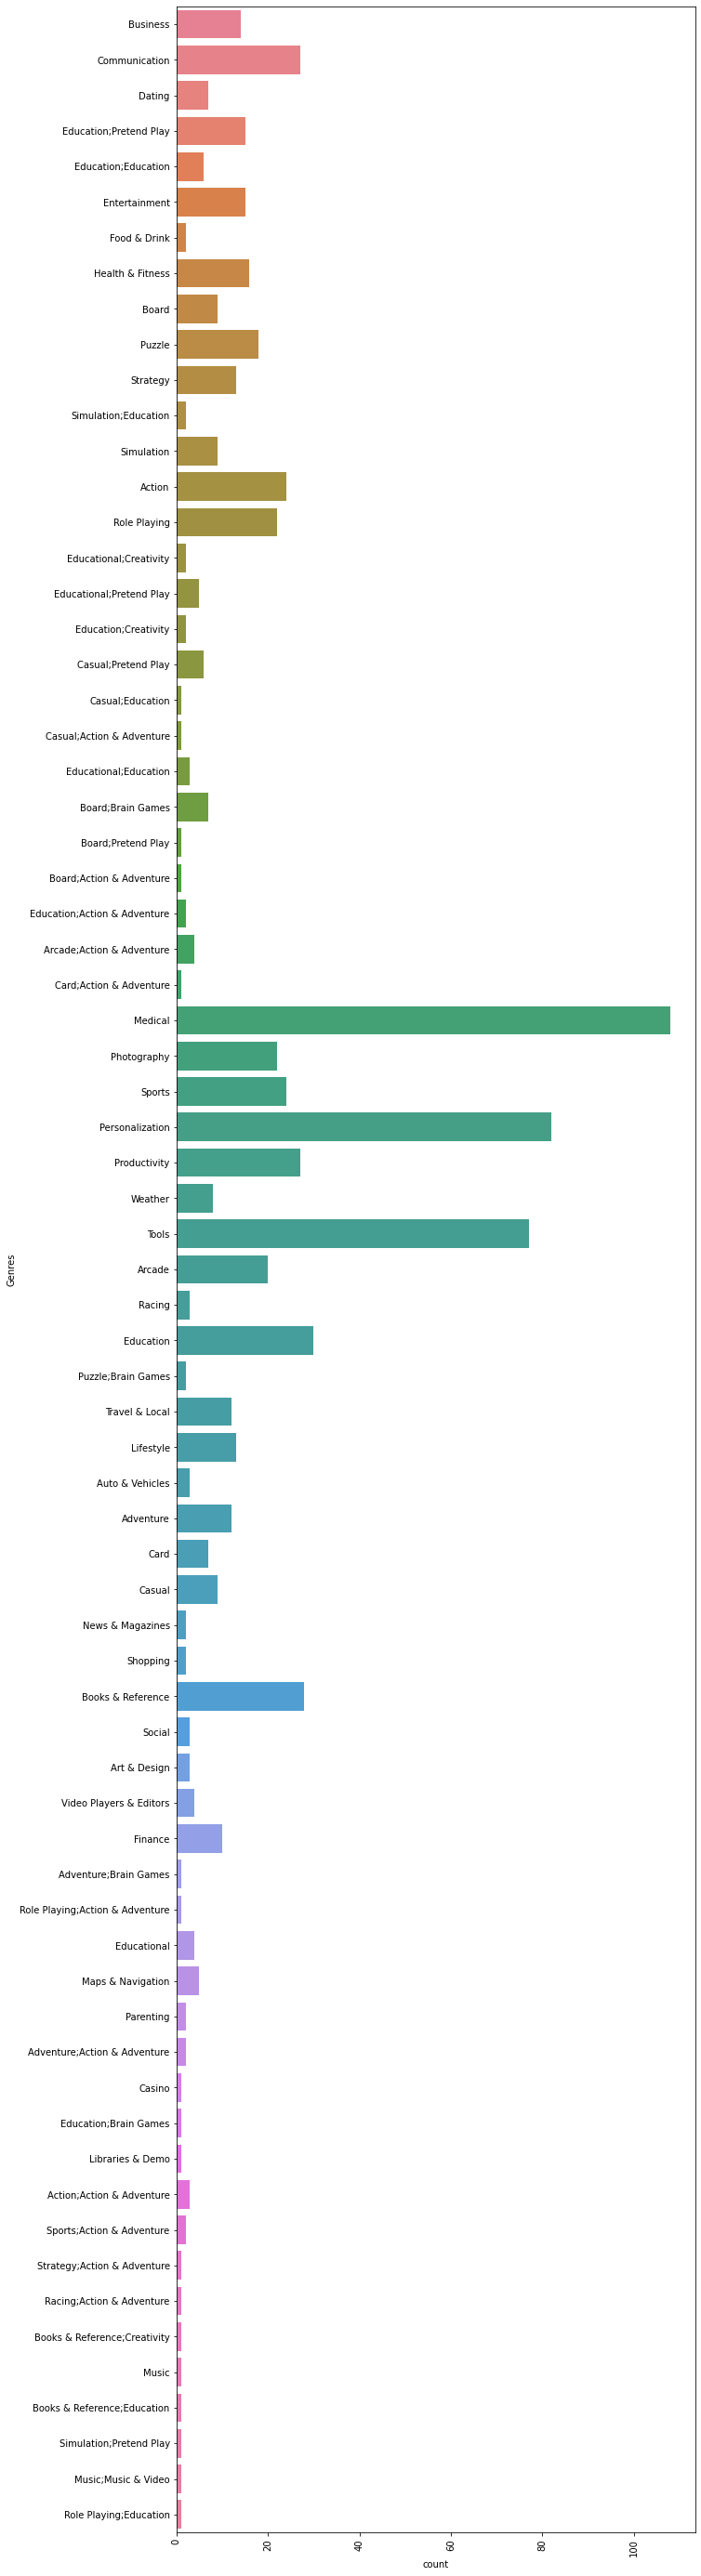

In [252]:
plt.figure(figsize=(10,50))
sns.countplot(y=moderate_exp_app['Genres'], palette ='husl')
plt.xticks(rotation='vertical',size=10)
plt.show()

---

## Visualization How Apps Ratings & Reviews Distributed

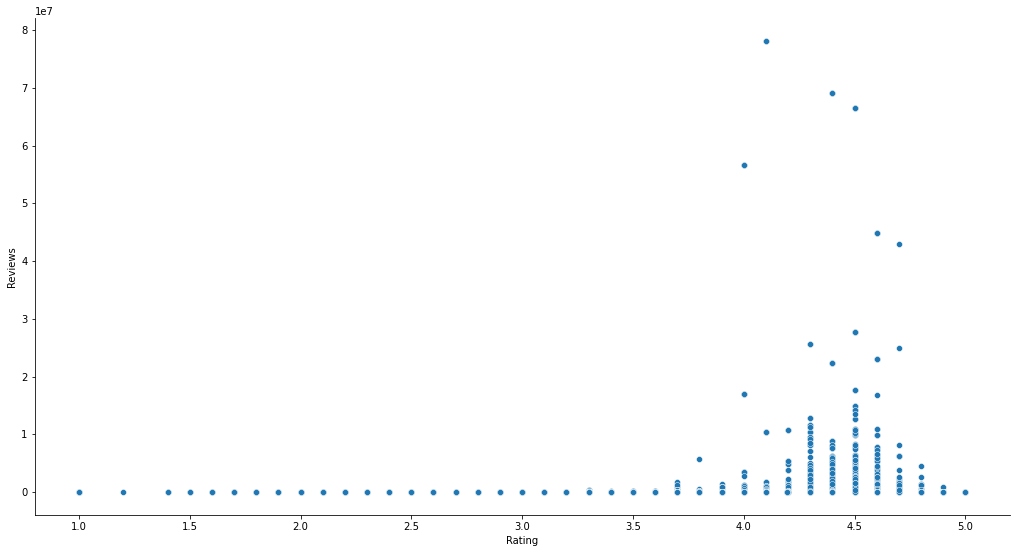

In [233]:
pl=sns.relplot(x='Rating',y='Reviews',data=df)
pl.fig.set_size_inches(15,8)
plt.show()